In [101]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold, TimeSeriesSplit
from sklearn.model_selection import GroupShuffleSplit, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_classif
import seaborn as sns

In [102]:
# Load the data from the .data file as a CSV
df = pd.read_csv('parkinsons_updrs.data')

# Display the first few rows
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [103]:
print(df.shape)

(5875, 22)


In [104]:
pd. set_option('display.max_rows', None)
print(df.dtypes) 

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [105]:
df['subject#'].describe()
y = df['subject#']
pd. set_option('display.max_rows', None)
print(y.value_counts())

subject#
29    168
41    165
35    165
7     161
34    161
24    156
5     156
6     156
9     152
42    150
8     150
38    149
1     149
10    148
2     145
17    144
3     144
25    144
39    143
15    143
40    142
37    140
16    138
23    138
11    138
4     137
14    136
33    135
28    134
20    134
31    130
26    130
27    129
36    129
19    129
30    126
18    126
21    123
13    112
22    112
12    107
32    101
Name: count, dtype: int64


In [106]:
df['motor_UPDRS'].describe()

count    5875.000000
mean       21.296229
std         8.129282
min         5.037700
25%        15.000000
50%        20.871000
75%        27.596500
max        39.511000
Name: motor_UPDRS, dtype: float64

In [107]:
df['total_UPDRS'].describe()

count    5875.000000
mean       29.018942
std        10.700283
min         7.000000
25%        21.371000
50%        27.576000
75%        36.399000
max        54.992000
Name: total_UPDRS, dtype: float64

In [108]:
df['sex'].value_counts()

sex
0    4008
1    1867
Name: count, dtype: int64

In [109]:
df['test_time'].value_counts()

test_time
 119.34000    15
 147.34000    14
 133.39000    12
 126.26000    12
 126.42000    12
 133.77000    11
 105.37000    11
 168.39000    11
 136.80000    11
 105.40000    10
 123.83000    10
 119.35000     9
 132.41000     9
 154.34000     9
 117.33000     9
 158.80000     9
 112.41000     7
 146.33000     7
 118.30000     7
 154.30000     7
 119.38000     7
 146.43000     7
 140.55000     6
 167.30000     6
 160.31000     6
 141.71000     6
 138.47000     6
 127.73000     6
 119.75000     6
 112.70000     6
 154.73000     6
 147.55000     6
 106.72000     6
 112.38000     6
 126.45000     6
 168.45000     6
 133.27000     6
 126.68000     6
 147.39000     6
 125.26000     6
 119.72000     6
 112.82000     6
 111.31000     6
 140.37000     6
 181.31000     6
 104.38000     6
 174.31000     6
 160.74000     6
 148.66000     6
 107.73000     6
 141.62000     6
 148.56000     6
 155.55000     6
 162.61000     6
 169.60000     6
 202.43000     6
 195.44000     6
 188.45000     6
 174

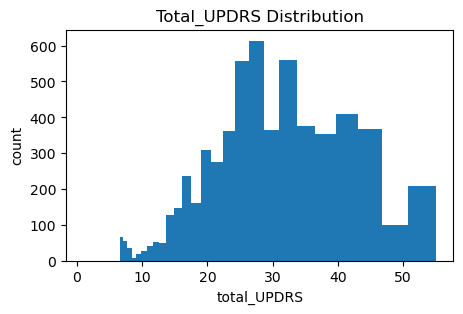

In [110]:
plt.figure(figsize=(5,3))

#df['total_UPDRS'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
df['total_UPDRS'].plot.hist( bins = np.logspace(np.log10(1),np.log10(np.max(df['total_UPDRS'])),50))  
plt.title('Total_UPDRS Distribution', fontsize=12)
plt.xlabel('total_UPDRS')
plt.ylabel('count')
plt.show()

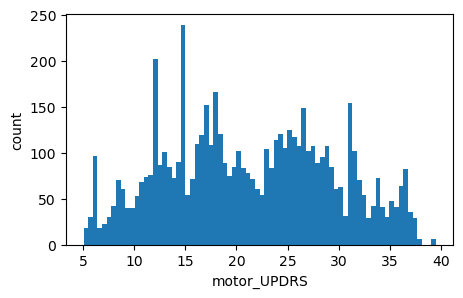

In [111]:
plt.figure(figsize=(5,3))

df['motor_UPDRS'].plot.hist(bins = int(np.sqrt(df.shape[0])))   #  
plt.xlabel('motor_UPDRS')
plt.ylabel('count')
plt.show()

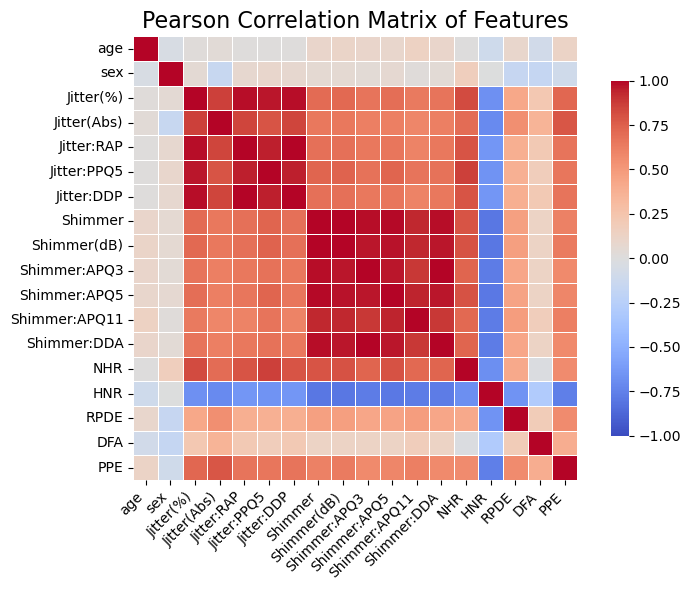

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
y = df['total_UPDRS'] 
X = df.loc[:, ~df.columns.isin(['total_UPDRS', 'motor_UPDRS', 'subject#', 'test_time'])]

# Step 1: Calculate the Pearson correlation matrix for the features in X
correlation_matrix = X.corr(method='pearson', min_periods=1, numeric_only=False)

# Step 2: Create a heatmap using seaborn without annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Step 3: Set axis labels and title
plt.title('Pearson Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

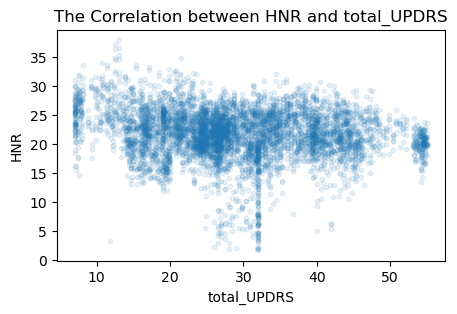

In [113]:
df.plot.scatter('total_UPDRS','HNR',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title('The Correlation between HNR and total_UPDRS', fontsize=12)
plt.show()


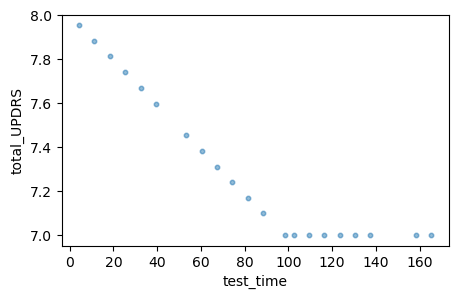

In [114]:
df_subject1 = df[df['subject#'] ==18]
df_subject1.plot.scatter('test_time', 'total_UPDRS', figsize=(5, 3), alpha=0.1, s=10)
plt.show()
##加title

In [117]:
## Split based on group, predict total_UPDRS.
random_state=42
y = df['total_UPDRS'] 
X = df.loc[:, ~df.columns.isin(['test_time', 'total_UPDRS', 'motor_UPDRS', 'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer','Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA'])]
groups = df['subject#']

gss = GroupShuffleSplit(n_splits=1, test_size=0.8, random_state=random_state) #set n_splits=1, split and keep the test first

# Split into train and other (remaining part)
test_idx, other_idx = next(gss.split(X, y, groups))

X_test, y_test, groups_test = X.iloc[test_idx], y.iloc[test_idx], groups.iloc[test_idx]
X_other, y_other, groups_other = X.iloc[other_idx], y.iloc[other_idx], groups.iloc[other_idx]

print('Test set:', pd.unique(groups_test))
print('Others set:',pd.unique(groups_other))

# splitter for _other
group_kfold = GroupKFold(n_splits=4)
for train_index, val_index in group_kfold.split(X_other, y_other, groups_other):
    # Use the correct index variables: train_index and val_index
    X_train, y_train, groups_train = X_other.iloc[train_index], y_other.iloc[train_index], groups_other.iloc[train_index]
    X_val, y_val, groups_val = X_other.iloc[val_index], y_other.iloc[val_index], groups_other.iloc[val_index]
    print("TRAIN:", pd.unique(groups_train), "Val:", pd.unique(groups_val))

pd. set_option('display.max_rows', None)

print(X_train.head())
print(X_test.head())
print(X_val.head())

Test set: [ 8 11 15 19 21 23 29 39]
Others set: [ 1  2  3  4  5  6  7  9 10 12 13 14 16 17 18 20 22 24 25 26 27 28 30 31
 32 33 34 35 36 37 38 40 41 42]
TRAIN: [ 1  2  3  5  7  9 12 13 14 16 20 22 24 25 26 27 28 30 32 34 36 37 38 40
 41 42] Val: [ 4  6 10 17 18 31 33 35]
TRAIN: [ 1  2  3  4  5  6  7 10 14 16 17 18 20 22 24 27 30 31 32 33 34 35 36 38
 40] Val: [ 9 12 13 25 26 28 37 41 42]
TRAIN: [ 3  4  5  6  9 10 12 13 17 18 20 22 25 26 27 28 31 32 33 34 35 37 38 40
 41 42] Val: [ 1  2  7 14 16 24 30 36]
TRAIN: [ 1  2  4  6  7  9 10 12 13 14 16 17 18 24 25 26 28 30 31 33 35 36 37 41
 42] Val: [ 3  5 20 22 27 32 34 38 40]
   subject#  age  sex  Jitter(Abs)  Shimmer(dB)       NHR     HNR     RPDE  \
0         1   72    0     0.000034        0.230  0.014290  21.640  0.41888   
1         1   72    0     0.000017        0.179  0.011112  27.183  0.43493   
2         1   72    0     0.000025        0.181  0.020220  23.047  0.46222   
3         1   72    0     0.000027        0.327  0.027837  

In [100]:
onehot_ftrs = ['sex']
std_ftrs = ['age','Jitter(Abs)','Shimmer(dB)','NHR','HNR','RPDE','DFA','PPE']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs), 
        ('std', StandardScaler(), std_ftrs)],
        #remainder='passthrough'  # This will keep the remaining columns
        )

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(3467, 10)
(3467, 10)
[[ 1.          0.          0.69539288 ... -1.02871476 -1.32310459
  -0.52445449]
 [ 1.          0.          0.69539288 ... -0.88179275 -1.09427855
  -1.0860789 ]
 [ 1.          0.          0.69539288 ... -0.63197957 -1.38426483
   0.01684942]
 ...
 [ 0.          1.          2.00787413 ... -0.49256386 -0.52312315
  -0.59179321]
 [ 0.          1.          2.00787413 ... -0.34692341 -0.8784683
  -0.1270155 ]
 [ 0.          1.          2.00787413 ... -0.27268432 -0.78973698
  -0.83380188]]


# Baseline

In [137]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming `X_train`, `X_test`, `y_train`, `y_test` are already defined and `y_train` corresponds to 'total_UPDRS'

# Calculate the mean of the training target
mean_baseline = np.mean(y)

# Predict the mean for every test instance
y_baseline_pred = np.full_like(y, mean_baseline)

# Calculate RMSE for the baseline
baseline_rmse = np.sqrt(mean_squared_error(y, y_baseline_pred))

print(f"Mean Baseline RMSE (using 'total_UPDRS'): {baseline_rmse:.4f}")
print(mean_baseline)

Mean Baseline RMSE (using 'total_UPDRS'): 10.6994
29.01894228085106


In [ ]:
def MLpipe_GroupKFold_RMSE(X, y, groups, preprocessor, ML_algo, param_grid):
    from sklearn.model_selection import GroupShuffleSplit, GroupKFold, GridSearchCV
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import mean_squared_error
    import numpy as np

    test_scores = []
    best_models = []
    cv_rmse_scores = []

    for state in range(20):
        # Step 1: Split the data into other/test sets using GroupShuffleSplit (80-20 split)
        gss = GroupShuffleSplit(n_splits=1, test_size=0.8, random_state=state)
        test_idx, other_idx = next(gss.split(X, y, groups))

        X_test, y_test, groups_test = X.iloc[test_idx], y.iloc[test_idx], groups.iloc[test_idx]
        X_other, y_other, groups_other = X.iloc[other_idx], y.iloc[other_idx], groups.iloc[other_idx]

        # Step 2: Set up GroupKFold with 4 splits for cross-validation
        group_kfold = GroupKFold(n_splits=4)

        # Step 3: Set up the pipeline with preprocessing and ML model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', ML_algo)
        ])

        # Step 4: Set up GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=group_kfold.split(X_other, y_other, groups_other),
            scoring='neg_mean_squared_error'
        )

        # Step 5: Fit the model and find the best parameters
        grid_search.fit(X_other, y_other)

        # Best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Cross-validation RMSE
        cv_rmse = np.sqrt(-grid_search.best_score_)
        cv_rmse_scores.append(cv_rmse)

        # Step 6: Evaluate the best model on the test set
        y_test_pred = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Append results
        test_scores.append(test_rmse)
        best_models.append(best_model)

    # Return mean and std of test RMSE and cross-validation RMSE
    return {
        'test_rmse_mean': np.mean(test_scores),
        'test_rmse_std': np.std(test_scores),
        'cv_rmse_mean': np.mean(cv_rmse_scores),
        'cv_rmse_std': np.std(cv_rmse_scores),
        'test_scores': test_scores,
        'best_models': best_models
    }


In [51]:
import pandas as pd
correlation = pd.DataFrame(X).corrwith(pd.Series(y_test))
print(correlation.sort_values(ascending=False))

subject#       0.678061
age            0.426433
Shimmer(dB)    0.314391
RPDE           0.310398
PPE            0.226326
Jitter(Abs)    0.203059
NHR            0.159914
DFA           -0.082357
sex           -0.255210
HNR           -0.293769
dtype: float64


In [136]:
from scipy.stats import spearmanr

# 斯皮尔曼相关系数
spearman_corr = {col: spearmanr(X[col], y)[0] for col in X.columns}
spearman_corr = pd.Series(spearman_corr)
print("\nSpearman Correlation:")
print(spearman_corr.sort_values(ascending=False))



Spearman Correlation:
age            0.318726
subject#       0.275136
PPE            0.155236
RPDE           0.149926
NHR            0.143972
Shimmer(dB)    0.139915
Jitter(Abs)    0.104178
sex           -0.069050
DFA           -0.141538
HNR           -0.162284
dtype: float64


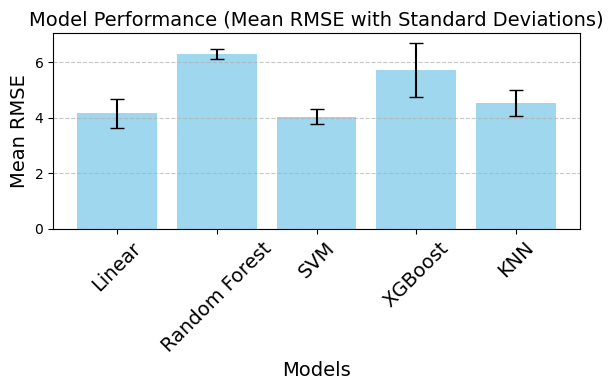

In [139]:
import matplotlib.pyplot as plt

# 数据
models = ['Linear', 'Random Forest', 'SVM',  'XGBoost','KNN']
mean_rmse = [4.1649, 6.2902, 4.0347, 5.7218, 4.5218]
std_rmse = [0.5238, 0.1675, 0.2755, 0.9808, 0.4592]

# 绘图
plt.figure(figsize=(6, 4))
plt.bar(models, mean_rmse, yerr=std_rmse, capsize=5, color='skyblue', alpha=0.8)
plt.ylabel('Mean RMSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.title('Model Performance (Mean RMSE with Standard Deviations)', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 显示图形
plt.show()


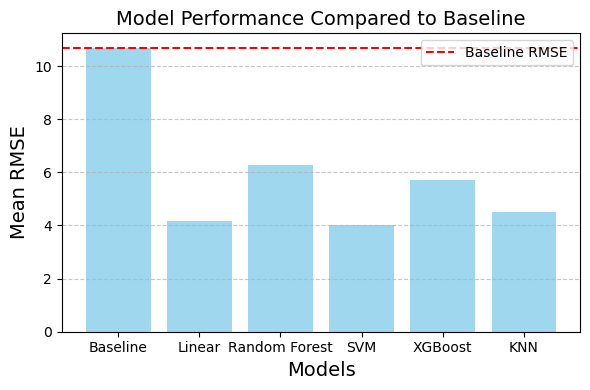

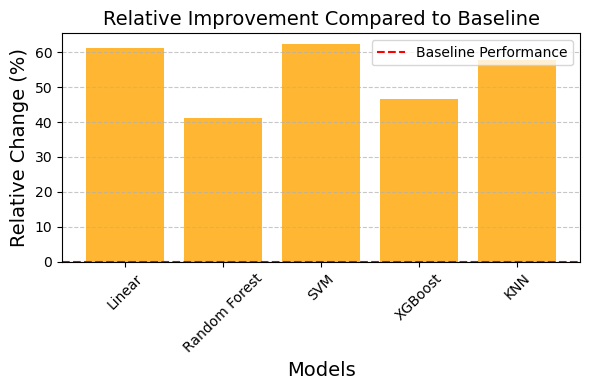

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Baseline', 'Linear', 'Random Forest', 'SVM',  'XGBoost','KNN']
rmse_values = [10.6994, 4.1649, 6.2902, 4.0347, 5.7218, 4.5218]
relative_changes = [(10.6994 - value) / 10.6994 * 100 for value in rmse_values[1:]]

# Plot RMSE Comparison
plt.figure(figsize=(6, 4))
plt.bar(models, rmse_values, color='skyblue', alpha=0.8)
plt.ylabel('Mean RMSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.title('Model Performance Compared to Baseline', fontsize=14)
plt.axhline(y=10.6994, color='red', linestyle='--', label='Baseline RMSE')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Relative Changes
plt.figure(figsize=(6, 4))
plt.bar(models[1:], relative_changes, color='orange', alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--', label='Baseline Performance')
plt.ylabel('Relative Change (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.title('Relative Improvement Compared to Baseline', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
